In [1]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

from scipy.fft import fft, ifft
from scipy.stats import shapiro
from scipy.stats import normaltest

from generation.config import SPACAL_DATA_DIR
from generation.data.data_preparation import generate_one_signal, get_detector_event_df,\
                                            generate_signals                                            

In [2]:
df = pd.read_pickle(os.path.join(SPACAL_DATA_DIR, "particles.pkl"))

In [3]:
def get_output_signals(detector_df, coef=10):
    output_signals = []
    for event in tqdm.tqdm(detector_df['event'].unique()):
        detector_event_df = detector_df[detector_df['event'] == event]
        for _ in range(coef):
            output_signal = generate_one_signal(detector_event_df, steps_num=1024, sample_coef=0.7)
            output_signal /= np.max(output_signal)
            output_signals.append(output_signal)

    output_signals = np.array(output_signals)
    return output_signals

In [4]:
detector = 1

detector_df = get_detector_event_df(df, detector=detector)
output_signals = get_output_signals(detector_df)
mean_signal = generate_one_signal(detector_df, steps_num=1024, sample_coef=1.0)
mean_signal /= np.max(mean_signal)
noises = np.array([output_signal - mean_signal for output_signal in output_signals])

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/generation/data/data_preparation.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['timestamp'], inplace=True)
100%|██████████| 62/62 [15:47<00:00, 15.28s/it]


In [7]:
len(output_signals)

620

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from torch.utils.data import DataLoader
from generation.data.dataset_pytorch import SignalsDataset
from generation.train.autoencoder import run_train, generate_new_signal

In [26]:
SAMPLE_SIZE = 1024
LATENT_DIM = 50
BATCH_SIZE = 64
NUM_EPOCHS = 100
LEARNING_RATE = 1e-3
PRINT_EACH = 25
VERBOSE = 1
NO_SAVE = True

dataset = SignalsDataset(noises)

epoch [1/100], loss:0.2314


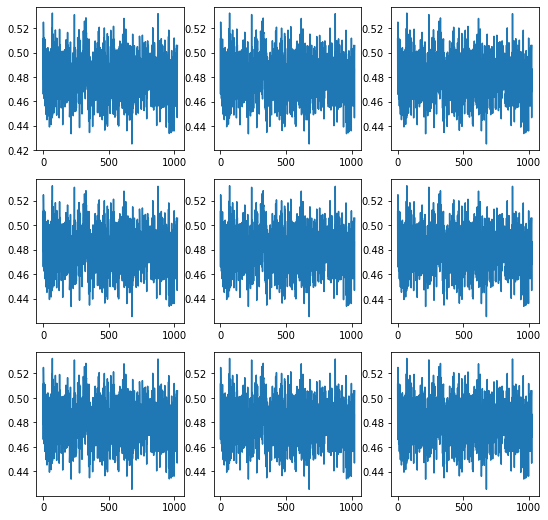

epoch [26/100], loss:0.0005


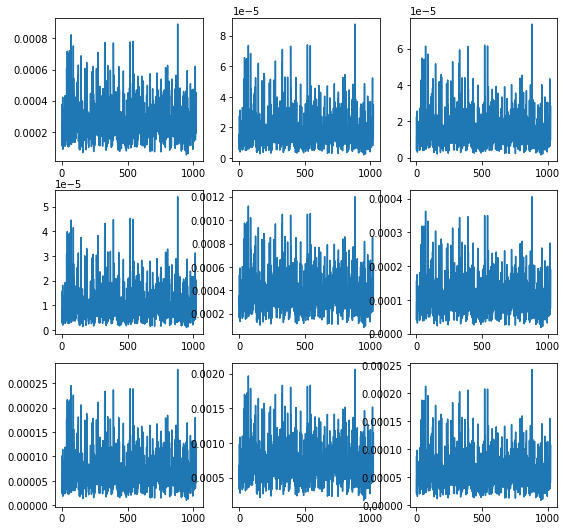

epoch [51/100], loss:0.0006


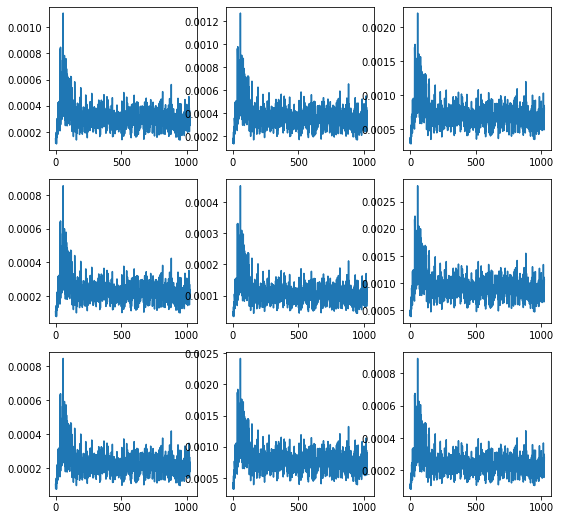

epoch [76/100], loss:0.0005


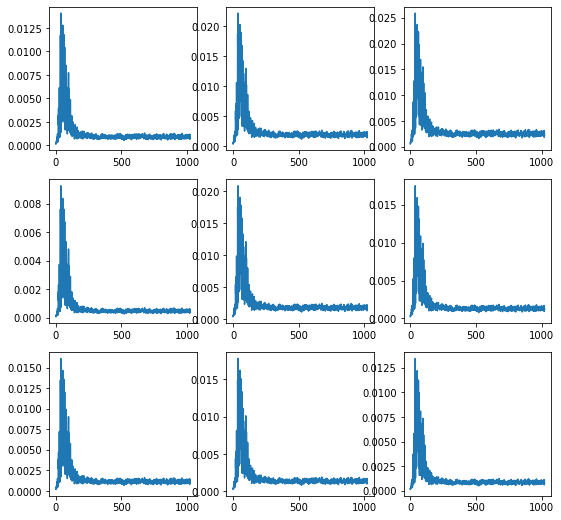

In [27]:
generator = run_train(dataset, \
          latent_dim=LATENT_DIM, \
          sample_size=SAMPLE_SIZE, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE)

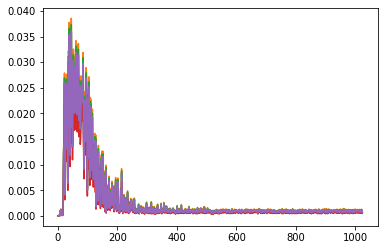

In [28]:
dim = 4

for _ in range(5):
    plt.plot(generate_new_signal(generator, dataset))
plt.show()

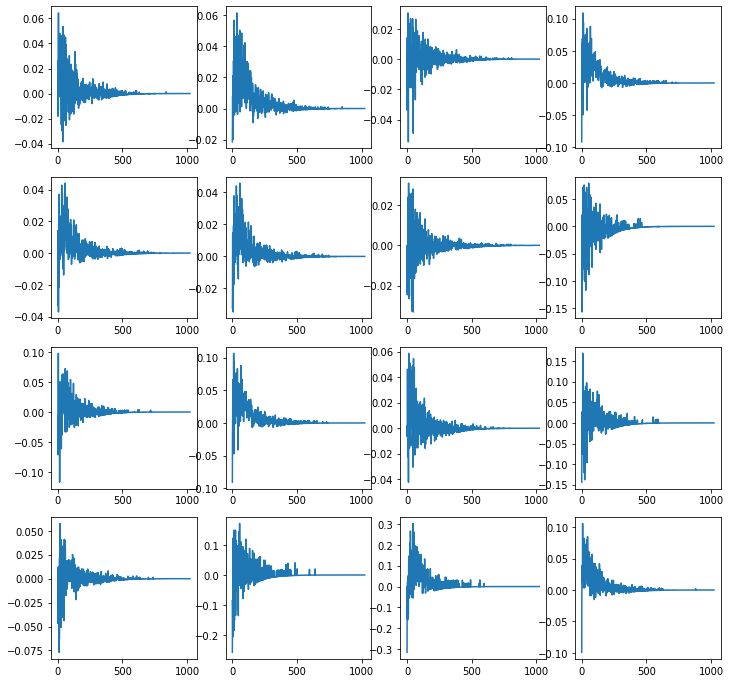

In [76]:
dim = 4
f, ax = plt.subplots(dim, dim, figsize=(12, 12))

for i in range(dim**2):
    ax[i%dim][i//dim].plot(noises[np.random.choice(len(noises))])
plt.show()

In [87]:
mean_noise = np.mean(noises, axis=0)

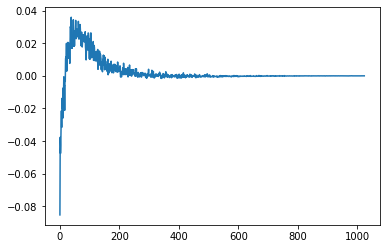

In [88]:
plt.plot(mean_noise)

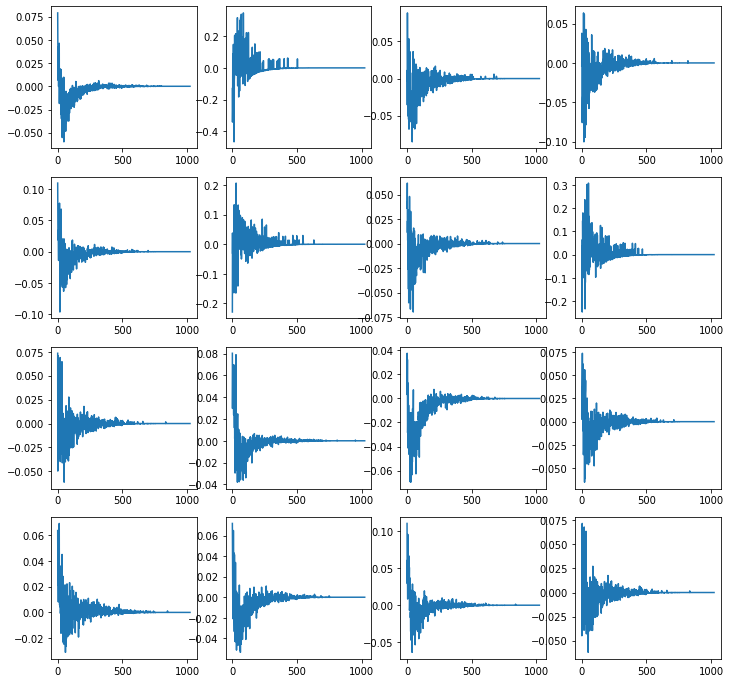

In [89]:
f, ax = plt.subplots(dim, dim, figsize=(12, 12))
for i in range(dim**2):
    noise = noises[np.random.choice(len(noises))]
    ax[i//dim][i%dim].plot(noise - mean_noise)
plt.show()

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


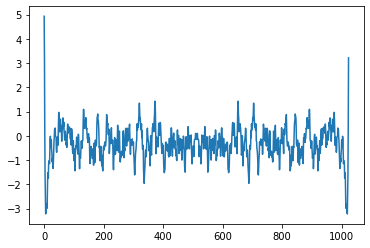

In [80]:
from scipy.fft import fft, ifft

# for i in range(dim**2):
noise = noises[np.random.choice(len(noises))]
noise_fft = fft(noise)
plt.plot(noise_fft)
plt.show()

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary 

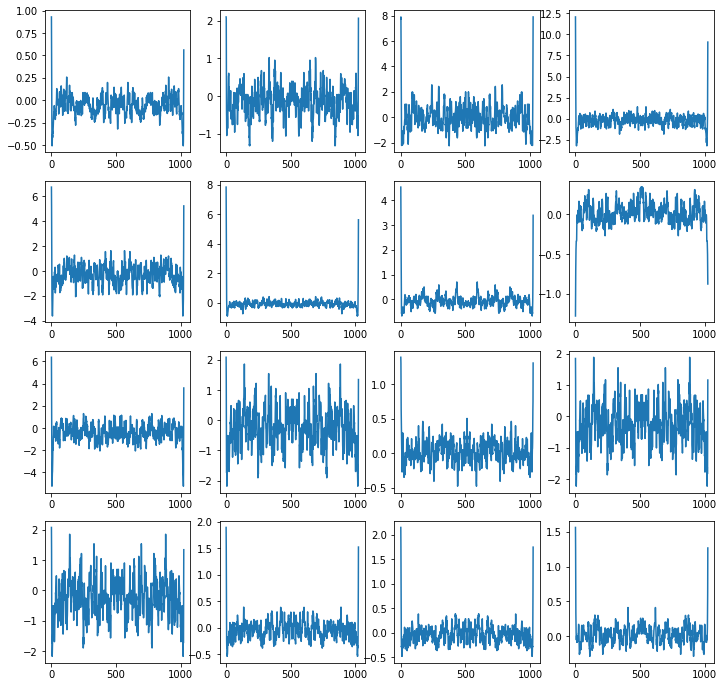

In [81]:
from scipy.fft import fft, ifft

f, ax =plt.subplots(dim, dim, figsize=(12, 12))
for i in range(dim**2):
    noise = noises[np.random.choice(len(noises))]
    noise_fft = fft(noise)
    ax[i//dim][i%dim].plot(noise_fft)
plt.show()

/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/pafakanov/data/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary 

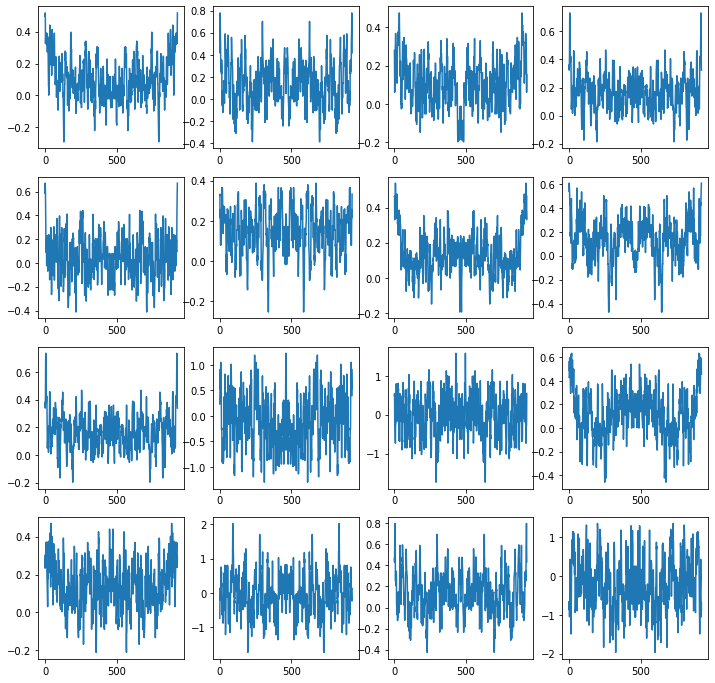

In [84]:
from scipy.fft import fft, ifft

f, ax =plt.subplots(dim, dim, figsize=(12, 12))
for i in range(dim**2):
    output = output_signals[np.random.choice(len(output_signals))]
    output_fft = fft(output)
    ax[i//dim][i%dim].plot(output_fft[50:-50])
plt.show()